In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c dogs-vs-cats

!mkdir data_animals


Saving kaggle.json to kaggle.json
100% 810M/812M [00:37<00:00, 24.1MB/s]
100% 812M/812M [00:37<00:00, 22.7MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip -d data_animals

In [ ]:
!unzip /content/data_animals/test1.zip -d data_animals/test1

In [ ]:
!unzip /content/data_animals/train.zip -d data_animals/train

In [6]:
import os , shutil

original_data_dir = '/content/data_animals'
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir , 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir , 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir , 'test' )
os.mkdir(test_dir)

cat_train_dir = os.path.join(train_dir , 'cats')
os.mkdir(cat_train_dir)
dog_train_dir = os.path.join(train_dir , 'dogs')
os.mkdir(dog_train_dir)

cat_val_dir = os.path.join(validation_dir , 'cats')
os.mkdir(cat_val_dir)
dog_val_dir = os.path.join(validation_dir , 'dogs')
os.mkdir(dog_val_dir)

cat_test_dir = os.path.join(test_dir , 'cats')
os.mkdir(cat_test_dir)
dog_test_dir = os.path.join(test_dir , 'dogs')
os.mkdir(dog_test_dir)

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  a = os.path.join('/content/data_animals/train/train' , fname)
  b = os.path.join(cat_train_dir , fname)
  shutil.copyfile(a,b)

In [8]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  a = os.path.join('/content/data_animals/train/train' , fname)
  b = os.path.join(dog_train_dir , fname)
  shutil.copyfile(a,b)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  a = os.path.join('/content/data_animals/train/train' , fname)
  b = os.path.join(cat_val_dir , fname)
  shutil.copyfile(a,b)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  a = os.path.join('/content/data_animals/train/train' , fname)
  b = os.path.join(dog_val_dir , fname)
  shutil.copyfile(a,b)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  a = os.path.join('/content/data_animals/train/train' , fname)
  b = os.path.join(cat_test_dir , fname)
  shutil.copyfile(a,b)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  a = os.path.join('/content/data_animals/train/train' , fname)
  b = os.path.join(dog_test_dir , fname)
  shutil.copyfile(a,b)

In [9]:
labels = [cat_train_dir , dog_train_dir , cat_val_dir , dog_val_dir , cat_test_dir , dog_test_dir]

for label in labels:
  print(f'Number of images in {label} : {len(os.listdir(label))}')

Number of images in /content/cats_and_dogs_small/train/cats : 1000
Number of images in /content/cats_and_dogs_small/train/dogs : 1000
Number of images in /content/cats_and_dogs_small/validation/cats : 500
Number of images in /content/cats_and_dogs_small/validation/dogs : 500
Number of images in /content/cats_and_dogs_small/test/cats : 500
Number of images in /content/cats_and_dogs_small/test/dogs : 500


In [10]:
# MODEL ARCHITECTURE

from tensorflow import keras
from keras import layers

inputs = keras.Input((180,180,3))
x = layers.Rescaling(1/255)(inputs)
x = layers.Conv2D(32 , 3 , activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)# 89 X89X32
x = layers.Conv2D(64 , 3 , activation= 'relu')(x)
x = layers.MaxPooling2D(2)(x)#43X43X64
x = layers.Conv2D(128 , 3 , activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)#20X20X128
x = layers.Conv2D(128 , 3 , activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)#9X9X128
x = layers.Flatten()(x)
x = layers.Dense(512 , activation = 'relu')(x)
outputs = layers.Dense(1 , activation = 'sigmoid')(x)

model = keras.Model(inputs , outputs)

model.compile(loss = 'binary_crossentropy' ,
             optimizer = 'rmsprop',
              metrics = ['accuracy'])

model.summary()
#model = models.Sequential(
#   [layers.Conv2D(32 , (3,3) ,activation = 'relu' , input_shape = (150,150,3)),
#    layers.MaxPooling2D((2,2)),# 74X74X32
#    layers.Conv2D(64 , (3,3) , activation = 'relu'),
#    layers.MaxPooling2D((2,2)),#36X36X64
#    layers.Conv2D(128 , (3,3) , activation = 'relu'),
#    layers.MaxPooling2D((2,2)),#17x17x128
#    layers.Conv2D(128 , (3,3) , activation = 'relu'),
#    layers.MaxPooling2D((2,2)),#7X7X128
#    layers.Flatten(),
#    layers.Dense(512 , activation = 'relu') ,
#    layers.Dense(1,activation = 'sigmoid')]
#
#
#model.compile(loss = 'binary_crossentropy' ,
#            optimizer = optimizers.RMSprop(learning_rate = 1e-4),
#             metrics = ['accuracy'])
#
#model.fit(X_train , Y_train)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [11]:
from tensorflow.python.ops.gen_batch_ops import batch
from keras.utils import image_dataset_from_directory

train_generator = image_dataset_from_directory(train_dir , image_size = (180,180) , label_mode = 'binary')
val_generator = image_dataset_from_directory(validation_dir , image_size = (180,180) , label_mode = 'binary')
test_generator = image_dataset_from_directory(test_dir , image_size = (180,180) , label_mode = 'binary')

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [12]:
type(train_generator)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [13]:
for data_batch , label_batch in train_generator :
  print(data_batch.shape , label_batch.shape)
  break;

(32, 180, 180, 3) (32, 1)


In [14]:
train_generator.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [15]:
examples = list(train_generator.as_numpy_iterator())
examples[0][0].shape

(32, 180, 180, 3)

In [ ]:
#@title
history_1 = model.fit(train_generator , validation_data= val_generator , epochs = 30)

History = history_1.history

In [ ]:
#@title
Titles = ['Loss' , 'Accuracy']

fig , axes = plt.subplots(1,2 , figsize = (10,5))
epochs = range(1,len(History['accuracy'])+1)

for i,label in enumerate([('loss' , 'val_loss') , ('accuracy' , 'val_accuracy')]):
  axes[i].scatter(epochs , History[label[0]] , Label = label[0])
  axes[i].plot(epochs , History[label[1]] , 'g-' , Label = label[1])
  axes[i].set_title(Titles[i] , fontsize = 16)
  axes[i].legend(fontsize = 14)

plt.tight_layout()
plt.show()

In [17]:
# DATA AUGMENTATION

data_aug = keras.Sequential(
    [
     layers.RandomFlip('horizontal'),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.2),
    ]
)

In [18]:
import matplotlib.pyplot as plt

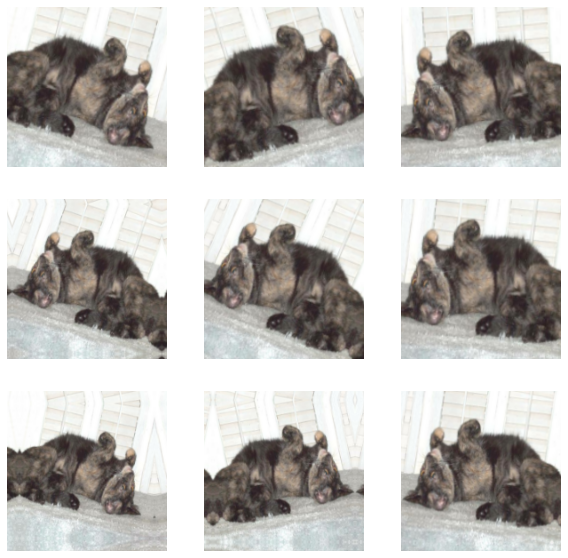

In [19]:
fig , axes = plt.subplots(figsize = (10,10))

for images , _ in train_generator.take(1):
  for i in range(9):
       augmented_images = data_aug(images) 
       ax = plt.subplot(3, 3, i + 1)
       plt.imshow(augmented_images[0].numpy().astype("uint8")) 
       plt.axis("off")

In [ ]:
#@title
# MODEL ARCHITECTURE

from tensorflow import keras
from keras import layers

inputs = keras.Input((180,180,3))
x = data_aug(inputs)
x = layers.Rescaling(1/255)(x)
x = layers.Conv2D(32 , 3 , activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)# 89 X89X32
x = layers.Conv2D(64 , 3 , activation= 'relu')(x)
x = layers.MaxPooling2D(2)(x)#43X43X64
x = layers.Conv2D(128 , 3 , activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)#20X20X128
x = layers.Conv2D(128 , 3 , activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)#9X9X128
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512 , activation = 'relu')(x)
outputs = layers.Dense(1 , activation = 'sigmoid')(x)

model_2 = keras.Model(inputs , outputs)

model_2.compile(loss = 'binary_crossentropy' ,
             optimizer = 'rmsprop',
              metrics = ['accuracy'])

model_2.summary()
#model = models.Sequential(
#   [layers.Conv2D(32 , (3,3) ,activation = 'relu' , input_shape = (150,150,3)),
#    layers.MaxPooling2D((2,2)),# 74X74X32
#    layers.Conv2D(64 , (3,3) , activation = 'relu'),
#    layers.MaxPooling2D((2,2)),#36X36X64
#    layers.Conv2D(128 , (3,3) , activation = 'relu'),
#    layers.MaxPooling2D((2,2)),#17x17x128
#    layers.Conv2D(128 , (3,3) , activation = 'relu'),
#    layers.MaxPooling2D((2,2)),#7X7X128
#    layers.Flatten(),
#    layers.Dense(512 , activation = 'relu') ,
#    layers.Dense(1,activation = 'sigmoid')]
#
#
#model.compile(loss = 'binary_crossentropy' ,
#            optimizer = optimizers.RMSprop(learning_rate = 1e-4),
#             metrics = ['accuracy'])
#
#model.fit(X_train , Y_train)


In [ ]:
#@title
history = model_2.fit(train_generator , validation_data= val_generator , epochs = 100)

History = history.history

In [ ]:
#@title
Titles = ['Loss' , 'Accuracy']

fig , axes = plt.subplots(1,2 , figsize = (20,5))
epochs = range(1,len(History['accuracy'])+1)

for i,label in enumerate([('loss' , 'val_loss') , ('accuracy' , 'val_accuracy')]):
  axes[i].scatter(epochs , History[label[0]] , Label = label[0])
  axes[i].plot(epochs , History[label[1]] , 'g-' , Label = label[1])
  axes[i].set_title(Titles[i] , fontsize = 16)
  axes[i].legend(fontsize = 14)

plt.tight_layout()
plt.show()


**FULLY CONNECTED LAYERS**

In [ ]:
#@title 
inputs = keras.Input(shape = (180,180,3))

x = layers.Flatten()(inputs)
x = layers.Dense(512 , activation = 'relu')(x)
#x = layers.Dense(256 , activation = 'relu')(x)
outputs  = layers.Dense(1 , activation = 'sigmoid')(x)

Model_3 = keras.Model(inputs , outputs)

Model_3.compile(loss = 'binary_crossentropy' , optimizer = 'rmsprop' , metrics = ['accuracy'])

In [ ]:
#@title
History_new = Model_3.fit(train_generator , validation_data= val_generator , epochs = 20)

history_obj = History_new.history

In [ ]:
#@title 
Titles = ['Loss' , 'Accuracy']

fig , axes = plt.subplots(1,2 , figsize = (20,5))
epochs = range(1,len(history_obj['accuracy'])+1)

for i,label in enumerate([('loss' , 'val_loss') , ('accuracy' , 'val_accuracy')]):
  axes[i].plot(epochs , history_obj[label[0]] , Label = label[0])
  axes[i].plot(epochs , history_obj[label[1]] , 'g-' , Label = label[1])
  axes[i].set_title(Titles[i] , fontsize = 16)
  axes[i].legend(fontsize = 14)

plt.tight_layout()
plt.show()


The above analysis indicates that Fully Connected Model is performing only a bit better than a no-learning Baseline

**PRETRAINED MODELS** 

In [20]:
# Using pretrained models helps in transforming the image array into generic features

from keras.applications import vgg16

conv_base = vgg16.VGG16( weights = 'imagenet' , include_top = False , input_shape = (180,180,3))

conv_base.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [ ]:
#@title 
inputs = keras.Input(shape = (5,5,512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
outputs = layers.Dense(1 , activation = 'sigmoid')(x)

model = keras.Model(inputs , outputs)

model.summary()

In [ ]:
#@title 
# WITHOUT DATA AUGMENTATION
import numpy as np

def get_features_labels(dataset):
    all_features = []
    labels = []

    for images, targets in dataset:
      all_features.append(conv_base.predict(images))
      labels.append(targets)
    return np.concatenate(all_features) , np.concatenate(labels)

train_features , train_labels = get_features_labels(train_generator)
val_features , val_labels = get_features_labels(val_generator)
test_features , test_labels = get_features_labels(test_generator)


In [ ]:
#@title
model.compile(loss = 'binary_crossentropy' , metrics = ['acc'] , optimizer = 'rmsprop')

In [ ]:
#@title 
history = model.fit(train_features , train_labels , epochs = 20 , validation_data = (val_features , val_labels))

In [ ]:
#@title 
hist = history.history

In [ ]:
#@title plot
Titles = ['Loss' , 'Accuracy']

fig , axes = plt.subplots(1,2 , figsize = (20,5))
epochs = range(1,len(hist['acc'])+1)

for i,label in enumerate([('loss' , 'val_loss') , ('acc' , 'val_acc')]):
  axes[i].scatter(epochs , hist[label[0]] , Label = label[0])
  axes[i].plot(epochs , hist[label[1]] , 'g-' , Label = label[1])
  axes[i].set_title(Titles[i] , fontsize = 16)
  axes[i].legend(fontsize = 14)

plt.tight_layout()
plt.show()


In [37]:
#@title 
Conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False)
Conv_base.trainable = False

In [ ]:
#@title 
# WITH DATA AUGMENTATION 

data_aug = keras.Sequential(
    [
     layers.RandomFlip('horizontal'),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape = (180,180,3))
x = data_aug(inputs)
x = vgg16.preprocess_input(x)
x = Conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1 , activation = 'sigmoid')(x)

model_aug = keras.Model(inputs , outputs)

model_aug.compile(loss = 'binary_crossentropy' , metrics = ['accuracy'] , optimizer = 'adam')



In [23]:
#@title  
model_aug.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                           

In [ ]:
#@title
Conv_model = model_aug.fit(train_generator , validation_data = val_generator , epochs = 20)

model_hist = Conv_model.history
model_hist

In [ ]:
#@title   
model_hist = Conv_model.history
model_hist

In [ ]:
#@title   
Titles = ['Loss' , 'Accuracy']

fig , axes = plt.subplots(1,2 , figsize = (20,5))
epochs = range(1,len(model_hist['accuracy'])+1)

for i,label in enumerate([('loss' , 'val_loss') , ('accuracy' , 'val_accuracy')]):
  axes[i].scatter(epochs , model_hist[label[0]] , Label = label[0])
  axes[i].plot(epochs , model_hist[label[1]] , 'g-' , Label = label[1])
  axes[i].set_title(Titles[i] , fontsize = 16)
  axes[i].legend(fontsize = 14)

plt.tight_layout()
plt.show()

In [25]:
model_aug.evaluate(test_generator)

32/32 [==============================] - 4s 111ms/step - loss: 2.9363 - accuracy: 0.9740


[2.9362504482269287, 0.9739999771118164]

In [39]:
# FINE TUNING THE PRE-TRAINED LAYERS

for layers in Conv_base.layers[-4:]:
  layers.trainable = False

In [41]:
inputs = keras.Input(shape = (180,180,3))
x = data_aug(inputs)
x = vgg16.preprocess_input(x)
x = Conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1 , activation = 'sigmoid')(x)

model_tune = keras.Model(inputs , outputs)

model_tune.compile(loss = 'binary_crossentropy' , metrics = ['accuracy'] , optimizer = 'adam')

AttributeError: ignored

In [30]:
model_aug.fit(train_generator , validation_data = val_generator , epochs = 10)

Epoch 1/10
63/63 [==============================] - 13s 197ms/step - loss: 1.0246 - accuracy: 0.9835 - val_loss: 1.9860 - val_accuracy: 0.9780
Epoch 2/10
63/63 [==============================] - 13s 201ms/step - loss: 0.4400 - accuracy: 0.9880 - val_loss: 1.7350 - val_accuracy: 0.9820
Epoch 3/10
63/63 [==============================] - 13s 197ms/step - loss: 0.4718 - accuracy: 0.9885 - val_loss: 1.4543 - val_accuracy: 0.9830
Epoch 4/10
63/63 [==============================] - 13s 200ms/step - loss: 0.4142 - accuracy: 0.9920 - val_loss: 0.8595 - val_accuracy: 0.9840
Epoch 5/10
63/63 [==============================] - 13s 203ms/step - loss: 0.5156 - accuracy: 0.9895 - val_loss: 0.7197 - val_accuracy: 0.9880


KeyboardInterrupt: ignored

In [28]:
conv_base.layers[-4:]